# 5.2 非线性SVM分类


In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

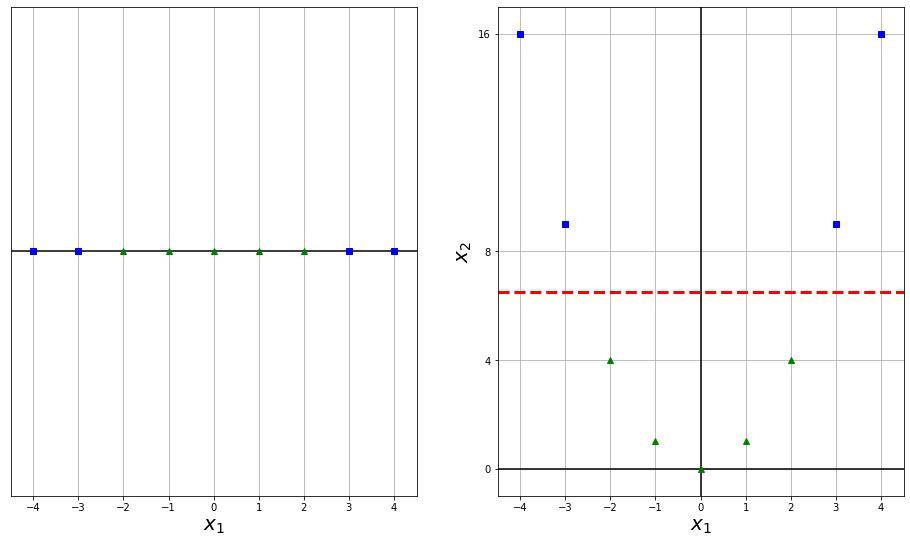

In [3]:
plt.figure(figsize=(16, 9))
plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), 'bs')
plt.plot(X1D[:, 0][y==1], np.zeros(5), 'g^')
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which="both")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], 'bs')
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], 'g^')
plt.gca().get_yaxis().set_ticks([0, 4, 8, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], 'r--', linewidth=3)
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)
plt.axis([-4.5, 4.5, -1, 17])
plt.show()

从上面的图可以看出本来无法分割的点，转为2次方之后就可以分割了。

In [4]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
X[0], y[0]


(array([ 1.61383833, -0.49115086]), 1)

In [5]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=15)
    plt.ylabel(r"$x_2$", fontsize=15)

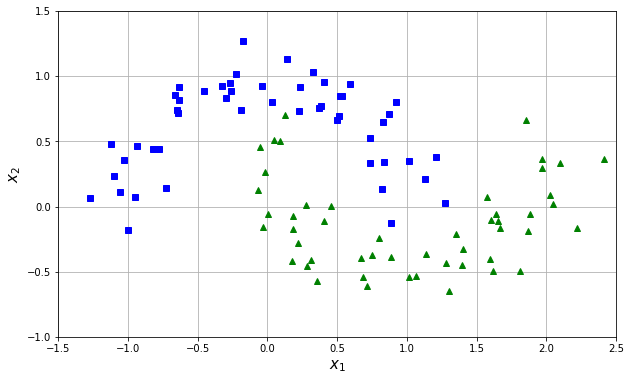

In [6]:
plt.figure(figsize=(10, 6))
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [7]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

ploynomial_svm_clf = Pipeline([
    ('ploy_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss="hinge", random_state=42))
])

ploynomial_svm_clf.fit(X, y)

Pipeline(steps=[('ploy_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [8]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape) 
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

<function matplotlib.pyplot.show(close=None, block=None)>

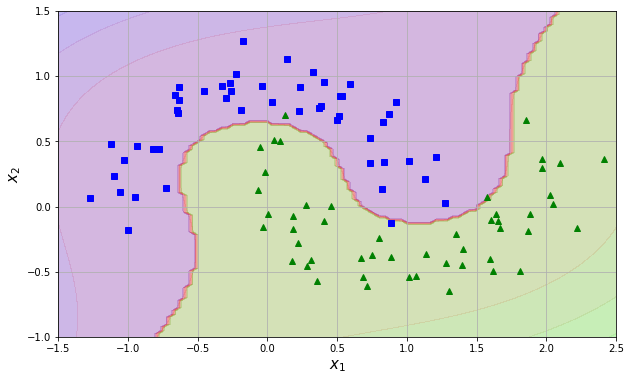

In [9]:
plt.figure(figsize=(10, 6))
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(ploynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.show

## 5.2.1 多项式核

添加多项式特征实现起来非常简单，并且对所有的机器学习算法（不只是SVM）都非常有效。但问题是，如果多项式太低阶，则处理不了非常复杂的数据集。而高阶则会创造出大量的特征，导致模型变得太慢。

幸运的是，使用SVM时，**有一个魔术般的数学技巧可以应用，这就是核技巧**。它产生的结果就跟添加了许多多项式特征（甚至是非常高阶的多项式特征）一样，但实际上并不需要真的添加。因为实际没有添加任何特征，所以也就不存在数量爆炸的组合特征了，这个技巧由SVC类来实现。

In [10]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [11]:
poly100_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=100, C=5))
])

poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Text(0.5, 1.0, '$d=10, r=100, C=5$')

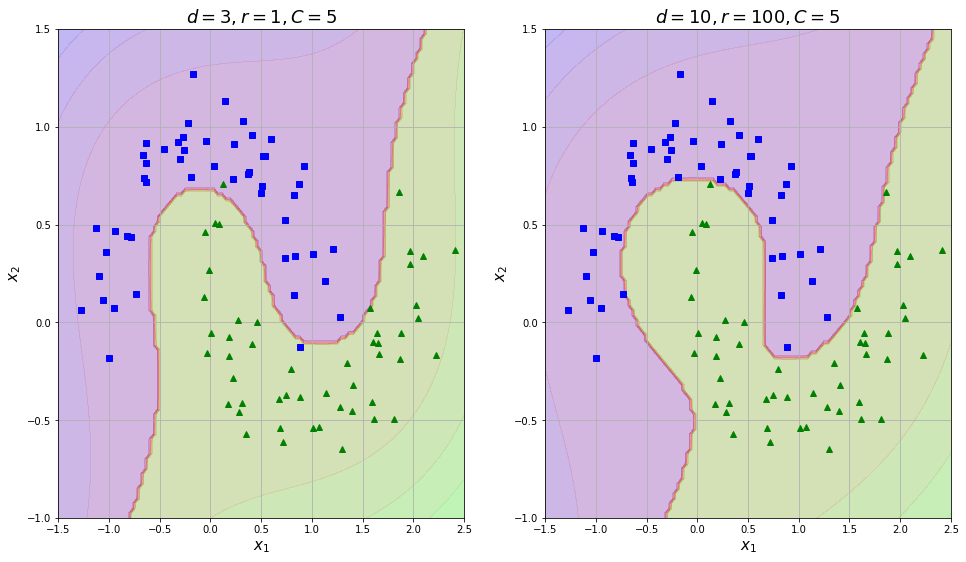

In [12]:
plt.figure(figsize=(16, 9))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

超参数coef0控制的是模型受高阶多项式还是低阶多项式影响的程度。

**寻找正确的超参数值的常用方法是网格搜索。先进行一次粗略的网格搜索，然后在最好的值附近展开一轮更精细的网格搜索，这样通常会快一些。多了解每个超参数实际上是用来做什么的，有助于你在超参数空间层正确搜索。**

## 5.2.2 相似特征

解决非线性问题的另一种技术是添加相似特征，这些特征经过相似函数计算得出，相似函数可以测量每个实例与一个特定地标之间的相似度。

下面使用高斯径向基函数(RBF)作为相似函数：

$$
\Phi(\mathbf{x}, l) = \exp(-\gamma||\mathbf{x} - l||^2)         \tag{5-1}
$$

这是一个从0（离地标差得非常远）到1（跟地标一样）变化的钟形函数。现在我们准备计算新特征。例如，我们看实例 $x_1=-1$ ：它与第一个地标的距离为1，与第二个地标的距离为2。因此它的新特征为 $x_2=eps（-0.3 \times 12）\approx 0.74$，$x_3=eps（-0.3 \times 22）\approx 0.30$ 。下图显示了转换后的数据集（去除了原始特征），现在你可以看出，数据呈线性可分离了。

In [13]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

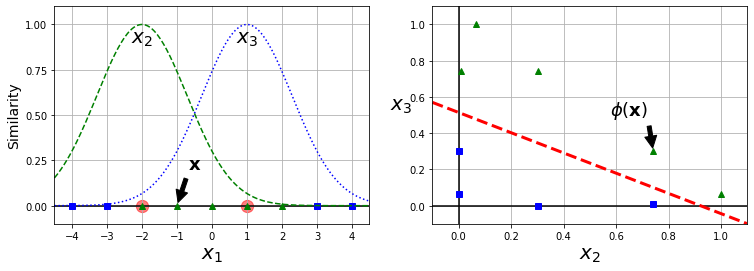

In [14]:
gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )

plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)
plt.show()

你可能想知道怎么选择地标。最简单的方法是在数据集里每一个实例的位置上创建一个地标。这会创造出许多维度，因而也增加了转换后的训练集线性可分离的机会。缺点是一个有m个实例n个特征的训练集会被转换成一个m个实例m个特征的训练集（假设抛弃了原始特征）。如果训练集非常大，那就会得到同样大数量的特征。

In [15]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


In [16]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

## 5.2.3 高斯RBF内核

与多项式特征方法一样，相似特征法也可以用任意机器学习算法，但是要计算出所有附加特征，其计算代价可能非常昂贵，尤其是对大型训练集来说。然而，核技巧再一次施展了它的SVM魔术：它能够产生的结果就跟添加了许多相似特征一样（但实际上也并不需要添加）。我们来使用SVC类试试高斯RBF核：


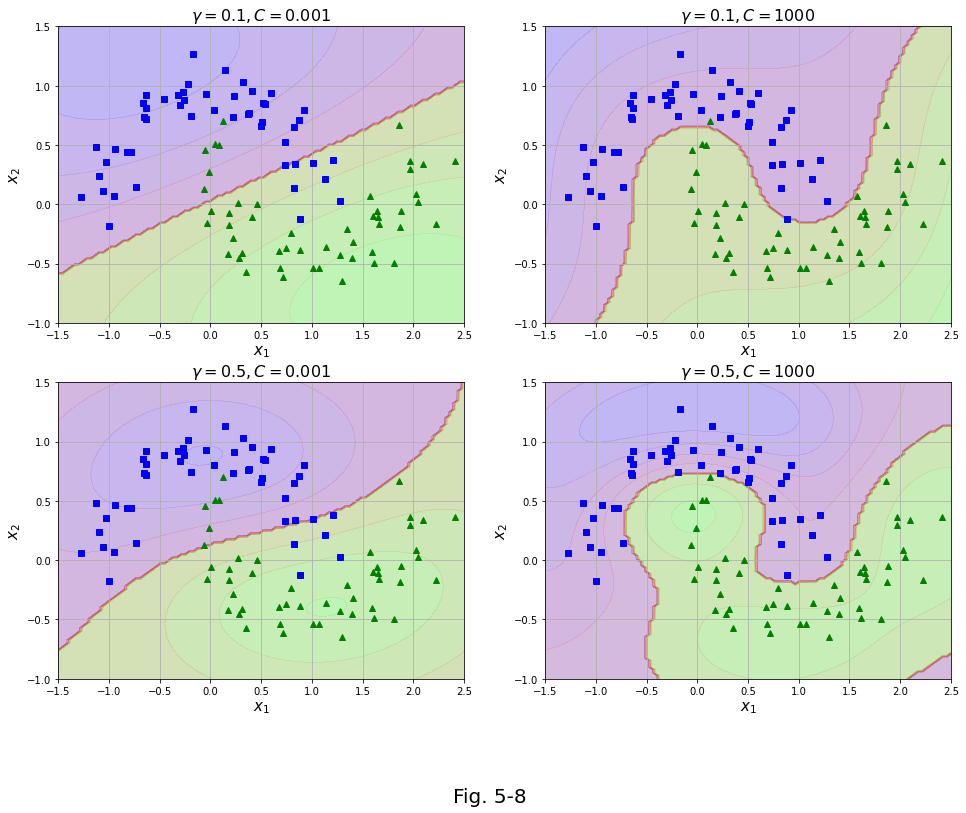

In [17]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 0.5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(16, 12))
plt.suptitle('Fig. 5-8', fontsize=20, y=0)

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

- 增加gamma值会使钟形曲线变得更窄（见图5-8的左图），因此每个实例的影响范围随之变小：决策边界变得更不规则，开始围着单个实例绕弯
- 减小gamma值使钟形曲线变得更宽，因而每个实例的影响范围增大，决策边界变得更平坦
- gamma就像是一个正则化的超参数：模型过拟合，就降低它的, 如果欠拟合则提升它的值


有这么多的核函数，该如何决定使用哪一个呢？有一个经验法则是，永远先从线性核函数开始尝试（要记住，LinearSVC比SVC（kernel="linear"）快得多），特别是训练集非常大或特征非常多的时候。如果训练集不太大，你可以试试高斯RBF核，大多数情况下它都非常好用。如果你还有多余的时间和计算能力，可以使用交叉验证和网格搜索来尝试一些其他的核函数，特别是那些专门针对你的数据集数据结构的核函数。

## 5.2.4 计算复杂度

liblinear库为线性SVM实现了一个优化算法，LinearSVC正是基于该库的。该算法不支持核技巧，不过它与训练实例的数量和特征数量几乎呈线性相关：其训练时间复杂度大致为O(m x n).

如果你想要非常高的精度，算法需要的时间更长。它由容差超参数 $\epsilon$ (在Scikit-Learn中为tol)控制。大多数分类任务中，默认的容差就够了。

SVC则是基于libsvm库的，这个库的算法支持核技巧。训练时间复杂度通常在 $O(m^2 \times n)$ 到$O(m^3 \times n)$之间。很不幸，这意味着如果训练实例的数量变大（例如成千上万的实例），它将会慢得可怕，所以这个算法完美适用于复杂但是中小型的训练集。但是，它还是可以良好地适应特征数量的增加，特别是应对稀疏特征（即每个实例仅有少量的非零特征）。在这种情况下，算法复杂度大致与实例的平均非零特征数成比例。

类 | 时间复杂度 | 核外支持 | 需要缩放 | 核技巧
:--------: | :--------: | :--------: | :--------: |
LinearSVC | $\Large O(m \times n)$ | 否 | 是 | 否
SGDClassifier | $\Large O(m \times n)$ | 是 | 是 | 否
SVC | $O(m^2 \times n)$ 到$O(m^3 \times n)$之间 | 否 | 是 | 是

